In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fname= f"/content/drive/MyDrive/BT4012/data/kaggle_transaction_dataset_centrality.csv"

df = pd.read_csv(fname)
df

,address,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,createdContracts,numUniqRecAddress,numUniqSentAddress,...,maxValSent,avgValSent,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance,degree_centrality,betweeness_centrality,eigenvector_centrality
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,5.807655e+04,7.148260e+07,46.00,66,21,0,17,47,...,183.0,5.559412,87,366.92119,367.213130,0.0,0.291940,0.000690,0.000035,5.955279e-04
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.000000e+00,7.529115e+08,35.00,0,2,0,2,0,...,0.0,0.000000,2,0.00000,0.013541,0.0,0.013541,0.000000,0.000000,7.626269e-22
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,1.710279e+06,6.820612e+07,299.00,15,22,0,21,13,...,25.0,13.330000,37,199.95000,200.216494,0.0,0.266494,0.000099,0.000002,5.036766e-05
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,1.576106e+04,1.352571e+07,36.00,109,111,0,104,54,...,680.0,14.959358,220,1630.57000,1630.577419,0.0,0.007419,0.000788,0.000056,6.104170e-04
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.000000e+00,3.751409e+08,82.00,1,4,0,4,1,...,1.9,1.900000,5,1.90000,1.902199,0.0,0.002199,0.000000,0.000000,1.065087e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20297,0xfc930bc7aa32b14a87f49a4e120ff54f8f0a5e05,1,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0,...,0.0,0.000000,0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-3.761354e-20
20298,0xfea28ca175a80f5a348016583961f63be8605f80,1,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0,...,0.0,0.000000,0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,-5.079336e-19
20299,0xff0e20e3a7575d823302bbb27e233c23f2c3070b,1,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0,...,0.0,0.000000,0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,1.983143e-20
20300,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0,...,0.0,0.000000,0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,2.919528e-19


Training LR
- Split into train and test

In [4]:
from sklearn.model_selection import train_test_split

# feature selection for training
print(df.columns)

df_model = df.copy().drop(columns=['address'])

# split train and test set
X, y = df_model.drop(columns=['flag']), df_model['flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Index(['address', 'flag', 'avgTimeBetweenSentTnx', 'avgTimeBetweenRecTnx',
       'lifetime', 'sentTransactions', 'receivedTransactions',
       'createdContracts', 'numUniqRecAddress', 'numUniqSentAddress',
       'minValReceived', 'maxValReceived', 'avgValReceived', 'minValSent',
       'maxValSent', 'avgValSent', 'totalTransactions', 'totalEtherSent',
       'totalEtherReceived', 'totalEtherSentContracts', 'totalEtherBalance',
       'degree_centrality', 'betweeness_centrality', 'eigenvector_centrality'],
      dtype='object')


Check for imbalanced class

In [5]:
df_model['flag'].value_counts()

0    14627
1     5675
Name: flag, dtype: int64

Training with SMOTE, oversampling minority class

In [6]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# transform df
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# summarise new class dist
counter = Counter(y_train_smote)
print(counter)

Counter({0: 9788, 1: 9788})


Logistic Regression with SMOTE sag model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [10]:
#l2
model = LogisticRegression(max_iter=10000, solver="sag", random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.736 (0.018)


In [11]:
model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=42, solver='sag')

In [12]:
import pickle
filename = 'model_lr_l2_sag_centrality.sav'
pickle.dump(model, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [13]:
model.score(X_test, y_test)

0.6814925373134328

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [15]:
filename = 'model_lr_l2_sag_centrality.sav'
model = pickle.load(open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'rb'))

In [16]:
predicted = model.predict(X_test)

In [17]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.68      0.75      4839
           1       0.45      0.70      0.55      1861

    accuracy                           0.68      6700
   macro avg       0.65      0.69      0.65      6700
weighted avg       0.74      0.68      0.70      6700



In [18]:
print(f"Accuracy: {accuracy_score(y_test, predicted)}")
print(f"Precision: {precision_score(y_test, predicted)}")
print(f"Recall: {recall_score(y_test, predicted)}")
print(f"F1-score: {f1_score(y_test, predicted)}")

Accuracy: 0.6814925373134328
Precision: 0.4523892570631322
Recall: 0.6969371305749597
F1-score: 0.5486463620981387


In [62]:
from sklearn.metrics import roc_auc_score
print(f"ROC AUC Score: {roc_auc_score(y_test, predicted)}")

ROC AUC Score: 0.6862449653701416


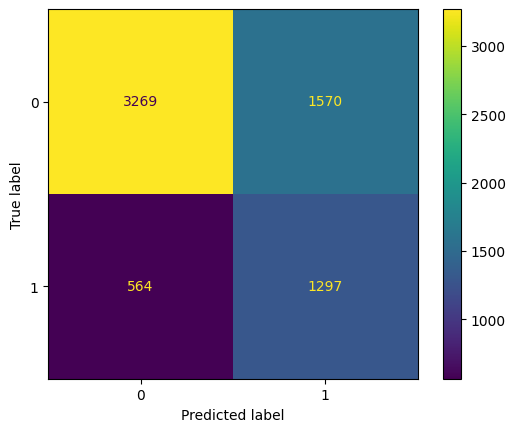

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()

Logistic Regression with SMOTE lbfgs model

In [20]:
#l2 (lbfgs)
model_lbfgs = LogisticRegression(max_iter=10000, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lbfgs, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.760 (0.013)


In [21]:
model_lbfgs.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=42)

In [22]:
import pickle
filename = 'model_lr_l2_centrality.sav'
pickle.dump(model_lbfgs, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [23]:
model_lbfgs.score(X_test, y_test)

0.6937313432835821

In [24]:
filename = 'model_lr_l2_centrality.sav'
model_lbfgs = pickle.load(open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'rb'))

In [25]:
predicted_lbfgs = model_lbfgs.predict(X_test)


In [26]:
print(classification_report(y_test, predicted_lbfgs))


              precision    recall  f1-score   support

           0       0.84      0.71      0.77      4839
           1       0.46      0.65      0.54      1861

    accuracy                           0.69      6700
   macro avg       0.65      0.68      0.66      6700
weighted avg       0.74      0.69      0.71      6700



In [27]:
print(f"Accuracy: {accuracy_score(y_test, predicted_lbfgs)}")
print(f"Precision: {precision_score(y_test, predicted_lbfgs)}")
print(f"Recall: {recall_score(y_test, predicted_lbfgs)}")
print(f"F1-score: {f1_score(y_test, predicted_lbfgs)}")


Accuracy: 0.6937313432835821
Precision: 0.4635635253719954
Recall: 0.6528747984954326
F1-score: 0.5421686746987951


In [63]:
print(f"ROC AUC Score: {roc_auc_score(y_test, predicted_lbfgs)}")

ROC AUC Score: 0.681159449258049


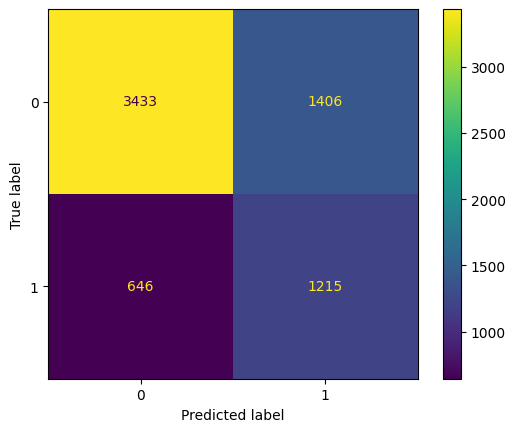

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_lbfgs, labels=model_lbfgs.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lbfgs.classes_)

disp.plot()
plt.show()

Oversampling training set

In [29]:
from imblearn.over_sampling import RandomOverSampler

print(Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0: 9788, 1: 3814})
Counter({0: 9788, 1: 9788})


In [30]:
model_over = LogisticRegression(max_iter=10000, random_state=42)
model_over.fit(X_train_over, y_train_over)
model_over.score(X_test, y_test)

0.767910447761194

In [31]:
predicted_over = model_over.predict(X_test)

In [32]:
print(f"Accuracy: {accuracy_score(y_test, predicted_over)}")
print(f"Precision: {precision_score(y_test, predicted_over)}")
print(f"Recall: {recall_score(y_test, predicted_over)}")
print(f"F1-score: {f1_score(y_test, predicted_over)}")

Accuracy: 0.767910447761194
Precision: 0.5696087352138307
Recall: 0.6727565824825362
F1-score: 0.61690071446169


In [64]:
print(f"ROC AUC Score: {roc_auc_score(y_test, predicted_over)}")

ROC AUC Score: 0.7386308227560439


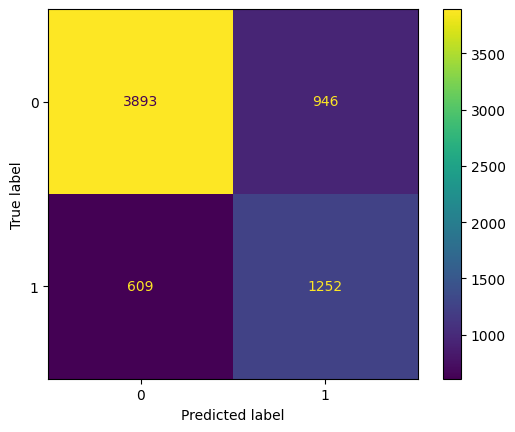

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_over, labels=model_over.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_over.classes_)

disp.plot()
plt.show()

Logistic Regression with Standardisation

Standard Scaler

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
oversample = SMOTE()
X_train_smote_scaled, y_train_smote_scaled = oversample.fit_resample(X_train_scaled, y_train)
# summarize the new class distribution
counter = Counter(y_train_smote_scaled)
print(counter)

Counter({0: 9788, 1: 9788})


In [69]:
model_smote_scaled = LogisticRegression(max_iter=10000, random_state=42)
model_smote_scaled.fit(X_train_smote_scaled, y_train_smote_scaled)
model_smote_scaled.score(X_test_scaled, y_test)

0.7226865671641791

In [70]:
predicted_smote_scaled = model_smote_scaled.predict(X_test_scaled)

In [71]:
import pickle
filename = 'model_lr_lbfgs_standardised_centrality.sav'
pickle.dump(model_smote_scaled, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [72]:
print(f"Accuracy: {accuracy_score(y_test, predicted_smote_scaled)}")
print(f"Precision: {precision_score(y_test, predicted_smote_scaled)}")
print(f"Recall: {recall_score(y_test, predicted_smote_scaled)}")
print(f"F1-score: {f1_score(y_test, predicted_smote_scaled)}")

Accuracy: 0.7226865671641791
Precision: 0.5004314063848145
Recall: 0.9349811929070392
F1-score: 0.6519295616335706


In [73]:
print(f"ROC AUC Score: {roc_auc_score(y_test, predicted_smote_scaled)}")

ROC AUC Score: 0.7880113652073945


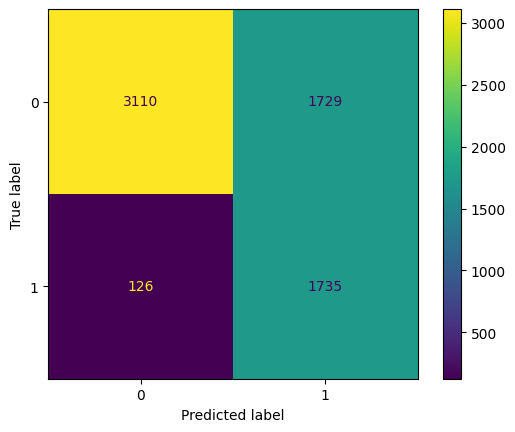

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_smote_scaled, labels=model_smote_scaled.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_smote_scaled.classes_)

disp.plot()
plt.show()

Min Max Scaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
oversample = SMOTE()
X_train_smote_scaled, y_train_smote_scaled = oversample.fit_resample(X_train_scaled, y_train)
# summarize the new class distribution
counter = Counter(y_train_smote_scaled)
print(counter)

Counter({0: 9788, 1: 9788})


In [43]:
model_smote_scaled = LogisticRegression(max_iter=10000, random_state=42)
model_smote_scaled.fit(X_train_smote_scaled, y_train_smote_scaled)
model_smote_scaled.score(X_test_scaled, y_test)

0.6623880597014925

In [44]:
predicted_smote_scaled = model_smote_scaled.predict(X_test_scaled)

In [45]:
filename = 'model_lr_lbfgs_standardised_centrality.sav'
pickle.dump(model_smote_scaled, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [46]:
print(f"Accuracy: {accuracy_score(y_test, predicted_smote_scaled)}")
print(f"Precision: {precision_score(y_test, predicted_smote_scaled)}")
print(f"Recall: {recall_score(y_test, predicted_smote_scaled)}")
print(f"F1-score: {f1_score(y_test, predicted_smote_scaled)}")

Accuracy: 0.6623880597014925
Precision: 0.44996256551035685
Recall: 0.968833960236432
F1-score: 0.614519427402863


In [66]:
print(f"ROC AUC Score: {roc_auc_score(y_test, predicted_smote_scaled)}")

ROC AUC Score: 0.7566839774317106


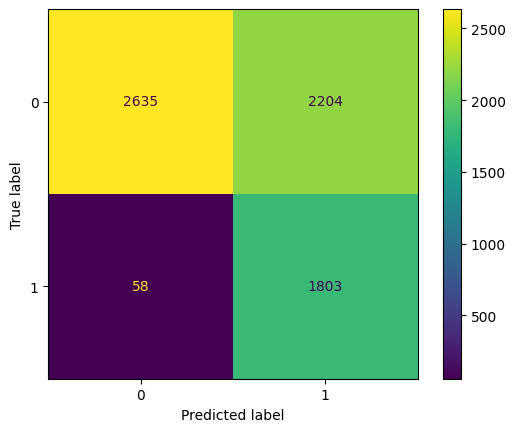

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_smote_scaled, labels=model_smote_scaled.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_smote_scaled.classes_)

disp.plot()
plt.show()

In [48]:
print(classification_report(y_test, predicted_smote_scaled))

              precision    recall  f1-score   support

           0       0.98      0.54      0.70      4839
           1       0.45      0.97      0.61      1861

    accuracy                           0.66      6700
   macro avg       0.71      0.76      0.66      6700
weighted avg       0.83      0.66      0.68      6700



Hyperparam tuning

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

oversample = SMOTE()
X_train_smote_scaled, y_train_smote_scaled = oversample.fit_resample(X_train_scaled, y_train)
# summarize the new class distribution
counter = Counter(y_train_smote_scaled)
print(counter)


Counter({0: 9788, 1: 9788})


GridSearchCV

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000, random_state=42)

pipe = Pipeline(steps=[('scaler', scaler),
                        ('logistic', logistic)])


In [51]:
# params of LR
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

params = dict(logistic__C=C,
              logistic__penalty=penalty)

In [52]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe, params, cv=10, scoring='accuracy')

clf.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             param_grid={'logistic__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [53]:
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print(clf.best_estimator_.get_params()['logistic'])

Best Penalty: l2
Best C: 10000.0
LogisticRegression(C=10000.0, max_iter=10000, random_state=42)


In [54]:
clf.score(X_test, y_test)

0.7325373134328358

In [55]:
log_best = LogisticRegression(C=10000, max_iter=10000, random_state=42)

In [56]:
log_best.fit(X_train_smote, y_train_smote)

LogisticRegression(C=10000, max_iter=10000, random_state=42)

In [57]:
log_best_predicted = log_best.predict(X_test)

In [58]:
print(f"Accuracy: {accuracy_score(y_test, log_best_predicted)}")
print(f"Precision: {precision_score(y_test, log_best_predicted)}")
print(f"Recall: {recall_score(y_test, log_best_predicted)}")
print(f"F1-score: {f1_score(y_test, log_best_predicted)}")

Accuracy: 0.6937313432835821
Precision: 0.4635635253719954
Recall: 0.6528747984954326
F1-score: 0.5421686746987951


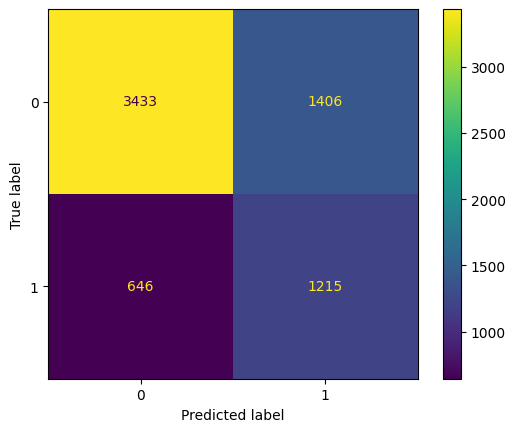

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, log_best_predicted, labels=log_best.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_best.classes_)

disp.plot()
plt.show()

fmin

In [60]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space = {
    # 'warm_start' : hp.choice('warm_start', [True, False]),
    # 'fit_intercept' : hp.choice('fit_intercept', [True, False]),
    'tol' : hp.uniform('tol', 0.00001, 0.0001),
    'C' : hp.uniform('C', 0.05, 3),
    'solver' : hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
    'max_iter' : hp.choice('max_iter', range(5,1000)),
    'l1_ratio': hp.uniform('x_l1',0,1),
}

def objective(space):
    solver=space['solver']
    # penalty=space['solver']['penalty']
    clf=LogisticRegression(C=space['C'], tol=space['tol'], l1_ratio=space['l1_ratio'], solver=solver, max_iter=space['l1_ratio'])
    clf.fit(X_train_smote_scaled, y_train_smote_scaled)
    acc=clf.score(X_test_scaled,y_test)
    return {'loss': -acc, 'status': STATUS_OK}


In [61]:
trials = Trials()

best_hyperparams_smote = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

ERROR:hyperopt.fmin:job exception: The 'max_iter' parameter of LogisticRegression must be an int in the range [0, inf). Got 0.07703070790512823 instead.


  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]


InvalidParameterError: ignored

In [ ]:
best_hyperparams_smote

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.2331574151340383, l1_ratio=0.7459657357162148, tol=2.1073284551232667e-05, max_iter=988)
model.fit(X_train_smote, y_train_smote)
model.score(X_test, y_test)

In [ ]:
import pickle
filename = 'model_lr_tuned_smote_centrality.sav'
pickle.dump(model, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, predicted)}")
print(f"Precision: {precision_score(y_test, predicted)}")
print(f"Recall: {recall_score(y_test, predicted)}")
print(f"F1-score: {f1_score(y_test, predicted)}")